# Challenge -- Classification Problem

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [115]:
df = pd.read_csv('challenge2_dataset.csv')

In [116]:
df.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [117]:
df.shape

(1995, 4)

### There are 1995 records and 4 features(3 features + 1 target feature)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1992 non-null   float64
 1   2       1992 non-null   float64
 2   3       1993 non-null   float64
 3   Target  1984 non-null   object 
dtypes: float64(3), object(1)
memory usage: 62.5+ KB


In [119]:
df.describe()

,1,2,3
count,1992.000000,1992.000000,1993.000000
mean,1.488800,1.741546,16.333166
std,22.145983,58.456685,42.407440
min,0.400000,0.100000,0.000000
25%,0.490000,0.150000,12.000000
50%,0.600000,0.220000,15.000000
75%,0.710000,0.300000,19.000000
max,600.000000,2600.000000,1900.000000


In [120]:
df.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

### There are 3 null values present in the 1st feature.
### There are 3 null values present in the 2nd feature.
### There are 2 null values present in the 3rd feature.
### There are 11 null values present in the target feature.

### The Null Values are approx 1% of the dataset, so it can be dropped

In [121]:
df.dropna(inplace=True)

# Converting Target values to numeric

In [122]:
df['Target']=np.where(df['Target'],1,0)

In [123]:
X = df.drop('Target',axis=1)
y = df['Target']

# EDA Exploratory Data Analysis

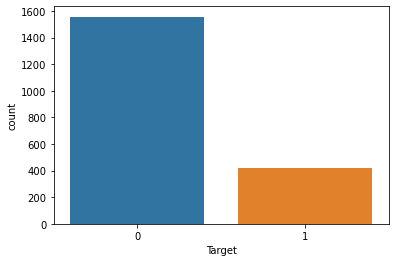

In [124]:
sns.countplot(df['Target'])
plt.show()

### Target variable is imbalanced as False values are more than True values

In [125]:
df['Target'].value_counts()*100/1977

0    78.75569
1    21.24431
Name: Target, dtype: float64

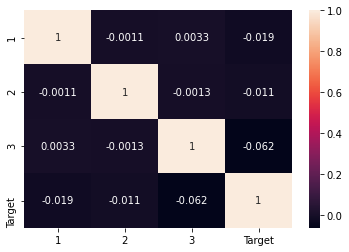

In [126]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### According to above heatmap, all features are important

# Spliting data

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [128]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(1383, 3)
(594, 3)
(594,)


# Model

## Logistic Regression

In [129]:
# Training model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

score_test = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Score:",score_test)
print("Confusion Matrix:\n",cm)

Score: 0.8703703703703703
Confusion Matrix:
 [[458  17]
 [ 60  59]]


In [133]:
print("Train score:",logreg.score(X_train,y_train))
print("Test score:",logreg.score(X_test,y_test))

Train score: 0.8510484454085322
Test score: 0.8703703703703703


###### Hyper-Parameter Tunning:

In [134]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
n_folds = 5            # n_folds = 10
param_grid = {'penalty':['l1','l2'],
              'tol':[0.0001],
              'C':range(1,10),
              'max_iter':[100]
             }
logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg,param_grid=param_grid,cv=n_folds)
grid_search.fit(X_train,y_train)

#rand_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, n_iter=n_folds)
#rand_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': range(1, 10), 'max_iter': [100],
                         'penalty': ['l1', 'l2'], 'tol': [0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
grid_search.best_params_   

{'C': 3, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}

In [136]:
logreg = LogisticRegression(C=3,max_iter=100,penalty='l2',tol=0.0001)

logreg.fit(X_train,y_train)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_pred = logreg.predict(X_test)

In [138]:
print("Train score:",logreg.score(X_train,y_train))
print("Test score:",logreg.score(X_test,y_test))

Train score: 0.8524945770065075
Test score: 0.8686868686868687


### In this dataset also Logistic regression will predict more accurately than other models as the independent variables are numerical

## Testing the dataset

In [143]:
test_df = pd.read_csv('challenge2_prediction.csv')

In [145]:
test_df.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [146]:
test_df.isnull().sum()

1    4
2    5
3    4
dtype: int64

In [148]:
test_df.fillna(test_df.median(),inplace=True)   ## Replacing null values with median

In [149]:
y_pred = pd.DataFrame(logreg.predict(test_df)) 

In [151]:
y_pred.replace({1:"True",0:"False"},inplace=True)

In [153]:
y_pred.to_csv('test3.csv')